Họ và tên : Nguyễn Minh Phú 
    
MSSV: 20280072

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
PATH = " " # Path to your file

df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)


## Data Analysis

In [5]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
df.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [7]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

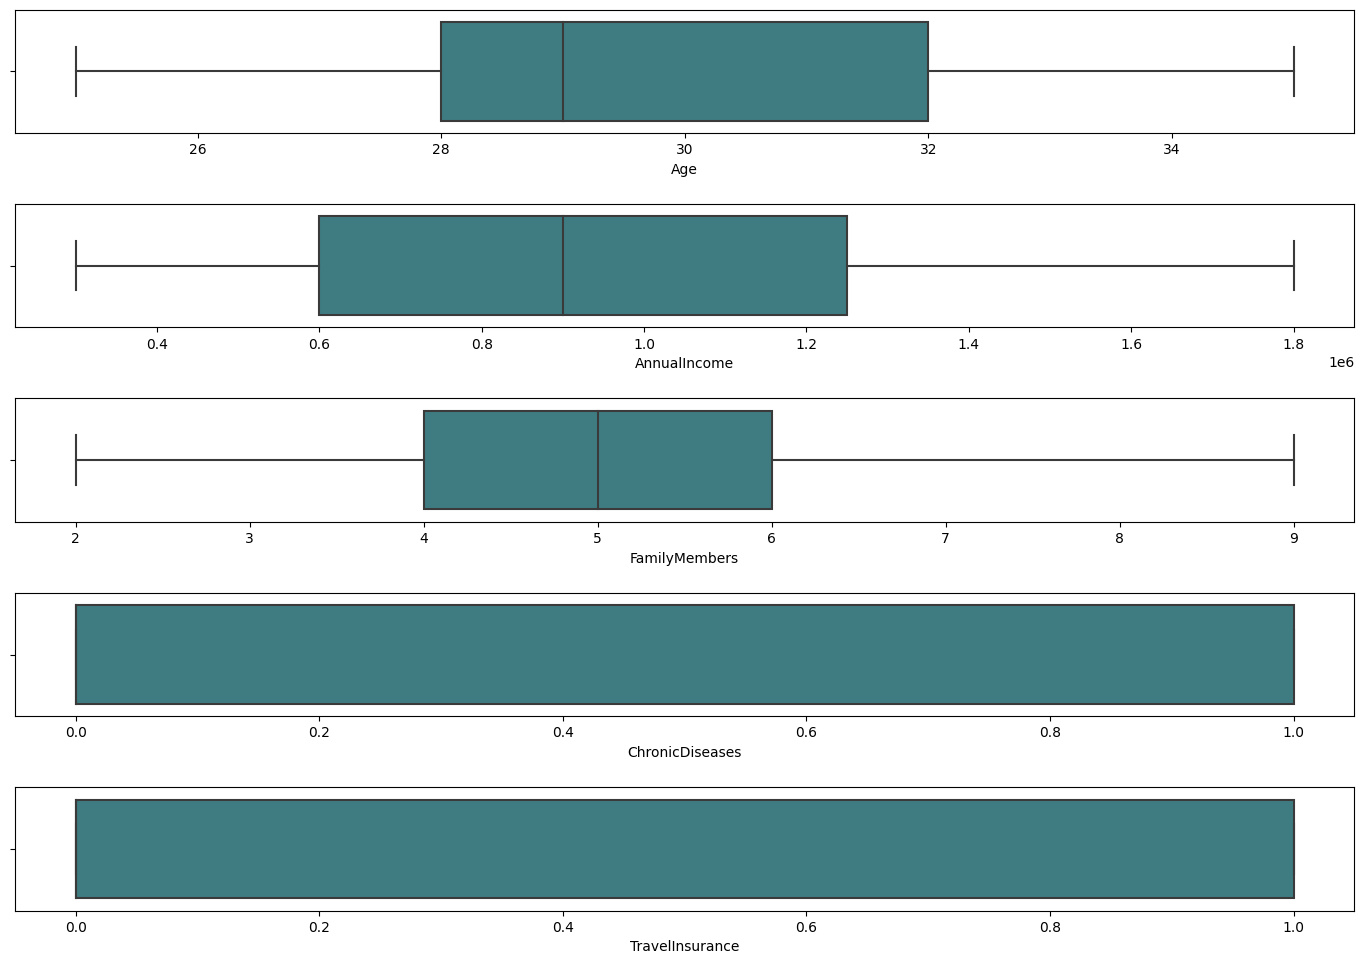

In [8]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

Không thấy được giá trị outlier 

<AxesSubplot:xlabel='GraduateOrNot', ylabel='count'>

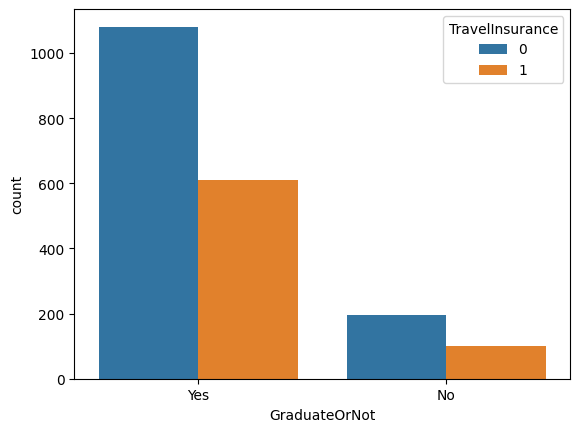

In [9]:
sns.countplot(data =df, x= 'GraduateOrNot', hue="TravelInsurance")

Dataset không gặp hiện tượng imbalance

<AxesSubplot:xlabel='Age', ylabel='TravelInsurance'>

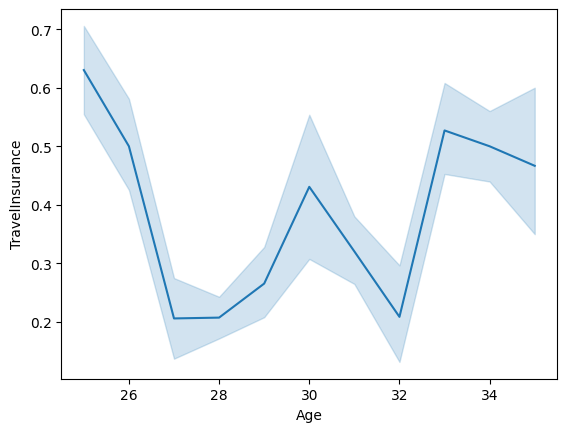

In [10]:
sns.lineplot(data =df, x= "Age", y="TravelInsurance")

<AxesSubplot:>

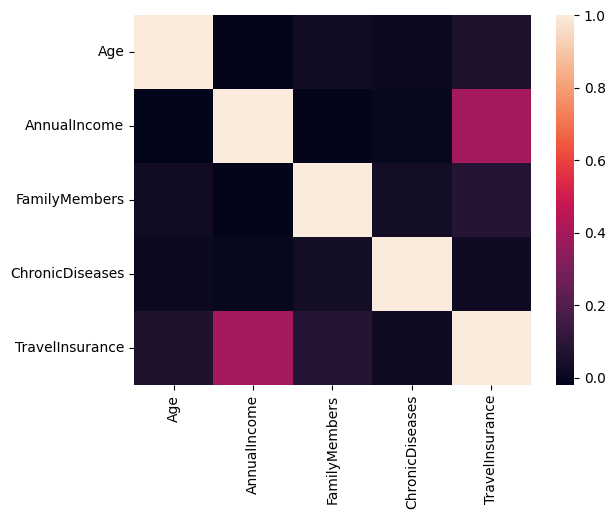

In [11]:
# Heatmap
import seaborn as sns

sns.heatmap(df.corr()) # Show heatmap after normalized data

## Preprocessing

In [12]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    if df.isnull().values.any():
        df = df.dropna() # Drop null values
    return df
df = preprocessing_data(df.copy())

## Feature Engineering

In [13]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"] # Lấy các features có dạng categorical (string) 
#cat_cols.remove("TravelInsurance")
X = pd.get_dummies(df, columns=cat_cols)
X = X.drop(["TravelInsurance"], axis=1)
y = df[df.columns[-1]].values
#y = [0 if i=="Yes" else 1 for i in y] 

# Apply machine learning model

## Train-test split

In [14]:
#Chia dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

## Build SK-learn model

### CategoricalNB with PCA and MinMaxScaler

In [15]:
# -- Build a full pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

nb = CategoricalNB()
scaler = MinMaxScaler()
pipe = Pipeline(steps=[ ('scaler', scaler),("nb", nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
alpha = np.logspace(5, -2, num=100)
param_grid = {
    'nb__alpha': alpha
}

search = GridSearchCV(pipe, param_grid, scoring="precision", n_jobs=8)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Best parameters: ", search.best_params_)
print("Training precision score: ", search.best_score_)
print("Test precision score: ", search.score(X_test, y_test))

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))


Best parameter (CV score=0.980):
{'nb__alpha': 1047.615752789665}
Best parameters:  {'nb__alpha': 1047.615752789665}
Training precision score:  0.9800000000000001
Test precision score:  0.8571428571428571
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       399
           1       0.86      0.24      0.38       198

    accuracy                           0.74       597
   macro avg       0.79      0.61      0.60       597
weighted avg       0.77      0.74      0.68       597



### BernoulliNB with PCA and MinMaxScaler

In [16]:
# -- Build a full pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
pca = PCA()
scaler = MinMaxScaler()

nb = BernoulliNB()
pipe = Pipeline(steps=[('scaler', scaler),("pca", pca), ("nb", nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
alpha = np.logspace(5, -0, num=100)
param_grid = {
    "pca__n_components": [0,2,4,6,8,10],
    'nb__alpha': alpha
    }

search = GridSearchCV(pipe, param_grid, scoring="precision", n_jobs=8)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Best parameters: ", search.best_params_)
print("Training precision score: ", search.best_score_)
print("Test precision score: ", search.score(X_test, y_test))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.883):
{'nb__alpha': 475.0810162102798, 'pca__n_components': 8}
Best parameters:  {'nb__alpha': 475.0810162102798, 'pca__n_components': 8}
Training precision score:  0.8825396825396826
Test precision score:  0.8292682926829268
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       399
           1       0.83      0.17      0.28       198

    accuracy                           0.71       597
   macro avg       0.77      0.58      0.55       597
weighted avg       0.75      0.71      0.64       597



### GaussianNB with PCA 

In [17]:
# -- Build a full pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
pca = PCA()
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("pca", pca), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(0, -5, num=100)
param_grid = {
    "pca__n_components": [0,2,4,6,8,10],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, scoring="precision", n_jobs=8)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Best parameters: ", search.best_params_)
print("Training precision score: ", search.best_score_)
print("Test precision score: ", search.score(X_test, y_test))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.929):
{'gau_nb__var_smoothing': 0.5590810182512224, 'pca__n_components': 2}
Best parameters:  {'gau_nb__var_smoothing': 0.5590810182512224, 'pca__n_components': 2}
Training precision score:  0.9291117940932938
Test precision score:  0.8771929824561403
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       399
           1       0.88      0.51      0.64       198

    accuracy                           0.81       597
   macro avg       0.84      0.73      0.76       597
weighted avg       0.82      0.81      0.80       597



In [18]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "Mời thầy đọc markdown ở dưới " \
           "Other conclusion: "

Metrics em dùng ở đây là precision vì muốn đảm bảo rằng tìm ra các khách hàng được thật sự có nhu cầu để ta có thể đẩy mạnh vào và tăng chỉ số mua hàng.

Đồng thời khi tìm ra được các khách hàng tiềm năng thì ta có thể dựa vào tính giải thích của model để tìm xem đâu là các features mà ta có thể đẩy mạnh vào để từ đó đưa ra được các quyết định cũng như chiến lược để tối ưu hóa "Travel Insurance Packages" này.

Naive Bayes model mà em đạt được kết quả tốt nhất là GaussianNB với hyperameters là :

'gau_nb__var_smoothing': 0.5590810182512224 

'pca__n_components': 2

Và không sử dụng scaler

In [22]:
search = GridSearchCV(pipe, param_grid, scoring="f1_macro", n_jobs=8)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Best parameters: ", search.best_params_)
print("Training precision score: ", search.best_score_)
print("Test precision score: ", search.score(X_test, y_test))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.719):
{'gau_nb__var_smoothing': 0.39442060594376555, 'pca__n_components': 2}
Best parameters:  {'gau_nb__var_smoothing': 0.39442060594376555, 'pca__n_components': 2}
Training precision score:  0.7191668241114223
Test precision score:  0.757020757020757
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       399
           1       0.88      0.51      0.64       198

    accuracy                           0.81       597
   macro avg       0.84      0.73      0.76       597
weighted avg       0.82      0.81      0.80       597

